In [1]:
import numpy as np
import torch
from fab.utils.plotting import plot_history, plot_contours
import matplotlib.pyplot as plt
from fab.target_distributions.many_well import ManyWellEnergy

from gradNS import HamiltonianNS, Param

In [2]:
dim = 32
target = ManyWellEnergy(dim=dim, a=-0.5, b=-6)

/Users/pablo/miniconda3/envs/fab/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_69nk78ncaj/croot/pytorch_1669252638507/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
def log_prob(theta):
    if theta.dim() == 1:
        theta = theta.reshape(1, -1)

    logp = target.log_prob(theta)
    return logp.reshape(-1)

In [4]:
params = []

for i in range(dim):
    params.append(
        Param(
            name=f'p{i}',
            prior_type='Uniform',
            prior=(-3, 3),
            label=f'p_{i}')
    )

ns = HamiltonianNS(
    nlive=1000,
    loglike=log_prob,
    params=params,
    verbose=True,
    clustering=False,
    tol=1e-2, 
    rejection_fraction=0.1, 
    dt_ini=1.
)

ns.run()

Decreasing dt to  0.5 out_frac =  tensor(0.5802) active =  500
Decreasing dt to  0.25 out_frac =  tensor(0.3094) active =  500
Decreasing dt to  0.125 out_frac =  tensor(0.1619) active =  500
Active: 145 / 500
Active: 36 / 500
Active: 8 / 500
Active: 2 / 500
---------------------------------------------
logZ = 58.5632, eps = 5.3353e+03, 1.0000
Active: 151 / 500
Active: 42 / 500
Active: 11 / 500
Active: 1 / 500
Active: 1 / 500
---------------------------------------------
logZ = 63.1665, eps = 2.6014e+03, 1.0000
Active: 128 / 500
Active: 26 / 500
Active: 8 / 500
Active: 3 / 500
---------------------------------------------
logZ = 67.3076, eps = 9.8227e+02, 1.0000
Active: 128 / 500
Active: 34 / 500
Active: 11 / 500
Active: 4 / 500
---------------------------------------------
logZ = 70.6989, eps = 6.7390e+02, 1.0000
Active: 126 / 500
Active: 33 / 500
Active: 4 / 500
---------------------------------------------
logZ = 73.8793, eps = 4.1241e+02, 1.0000
Active: 164 / 500
Active: 40 / 500
A

In [5]:
print(f'True log Z {target.log_Z - np.log(6.**dim)}')

True log Z 107.35937230449913


In [11]:
# Get equally weighted samples
an = ns.convert_to_anesthetic()
ns_samples = an.posterior_points()
s = np.array(ns_samples[ns.paramnames])

In [12]:
def get_target_log_prob_marginal_pair_alt(log_prob_2d, i: int, j: int):
    def log_prob(x):
        if i % 2 == 0:
            first_dim_x = torch.zeros_like(x)
            first_dim_x[:, 0] = x[:, 0]
        else:
            first_dim_x = torch.zeros_like(x)
            first_dim_x[:, 1] = x[:, 0]
        if j % 2 == 0:
            second_dim_x = torch.zeros_like(x)
            second_dim_x[:, 0] = x[:, 1]
        else:
            second_dim_x = torch.zeros_like(x)
            second_dim_x[:, 1] = x[:, 1]
        return log_prob_2d(first_dim_x) + log_prob_2d(second_dim_x)
    return log_prob

Text(-2, 3.5, 'Gradient-Guided Nested Sampling')

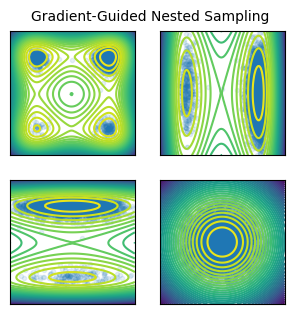

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9/2.54, 9/2.54))
plotting_bounds = (-3, 3)

plot_contours(get_target_log_prob_marginal_pair_alt(target.log_prob_2D, 0 , 1), bounds=plotting_bounds, n_contour_levels=40, ax=axs[0, 1], grid_width_n_points=100)
axs[0, 1].scatter(s[:,0], s[:, 1], marker='.', alpha=0.1)
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

plot_contours(get_target_log_prob_marginal_pair_alt(target.log_prob_2D, 0 , 2), bounds=plotting_bounds, n_contour_levels=40, ax=axs[0, 0], grid_width_n_points=100)
axs[0, 0].scatter(s[:,0], s[:, 2], marker='.', alpha=0.1)
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

plot_contours(get_target_log_prob_marginal_pair_alt(target.log_prob_2D, 1 , 2), bounds=plotting_bounds, n_contour_levels=40, ax=axs[1, 0], grid_width_n_points=100)
axs[1, 0].scatter(s[:,1], s[:, 2], marker='.', alpha=0.1)
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

plot_contours(get_target_log_prob_marginal_pair_alt(target.log_prob_2D, 1 , 3), bounds=plotting_bounds, n_contour_levels=40, ax=axs[1, 1], grid_width_n_points=100)
axs[1, 1].scatter(s[:,1], s[:, 3], marker='.', alpha=0.1)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[0,0].text(-2, 3.5, 'Gradient-Guided Nested Sampling', fontsize=10)